In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from GaiaFunctions import *

In [2]:
filename='HyadesCluster.csv'
df=pd.read_csv(filename)

In [3]:
df.columns

Index(['solution_id', 'ra', 'dec', 'parallax', 'pm', 'pmra', 'pmdec',
       'phot_g_mean_flux', 'phot_g_mean_mag', 'phot_bp_mean_flux',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_mag', 'bp_rp',
       'bp_g', 'g_rp', 'radial_velocity', 'phot_variable_flag', 'l', 'b',
       'non_single_star', 'has_rvs', 'teff_gspphot', 'logg_gspphot'],
      dtype='object')

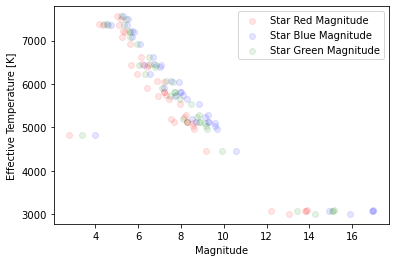

In [4]:
plt.scatter(df.phot_rp_mean_mag,df.teff_gspphot, color='red', alpha=0.1, label='Star Red Magnitude')
plt.scatter(df.phot_bp_mean_mag,df.teff_gspphot, color='Blue', alpha=0.1, label='Star Blue Magnitude')
plt.scatter(df.phot_g_mean_mag,df.teff_gspphot, color='Green', alpha=0.1, label='Star Green Magnitude')
plt.ylabel("Effective Temperature [K]")
plt.xlabel("Magnitude")
plt.legend()

The higher the effective temperature of a star, the lower its green magnitude is. The relationship between the 2 variables is almost linear with the exception of stars with a higher green magnitude and lower effective temperature breaking off of the trend (perhaps just outliers).

All three plots generally resemble each other with the exception that they are all slightly shifted from each other. This means that for the same star the red, green and blue magnitudes follow the trend red mag < green mag < blue mag. What is also interesting is that for stars of lower effective temperature, the values for red, green and blue magnitudes are further apart that stars with a higher effective temperature value. This is because brighter stars emit relatively more blue light than green light.

Text(0, 0.5, 'Red Magnitude')

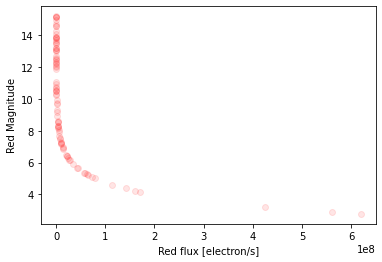

In [5]:
plt.scatter(df.phot_rp_mean_flux,df.phot_rp_mean_mag, color='red', alpha=0.1)
plt.xlabel("Red flux [electron/s]")
plt.ylabel("Red Magnitude")

Text(0, 0.5, 'Green Magnitude')

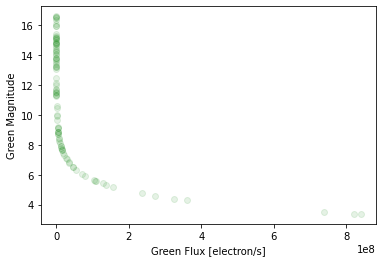

In [6]:
plt.scatter(df.phot_g_mean_flux,df.phot_g_mean_mag, color='green', alpha=0.1)
plt.xlabel("Green Flux [electron/s]")
plt.ylabel("Green Magnitude")

The trends on bith plotsare similar but the plot of green mag vs. flux is shifted up along the y axis which makes sense because the stars in the dataset have a greater green magnitude than red.

Text(0, 0.5, 'Red Magnitude')

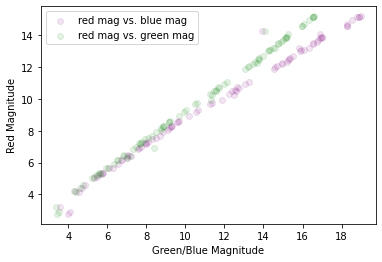

In [7]:
plt.scatter(df.phot_bp_mean_mag,df.phot_rp_mean_mag, color='purple', alpha=0.1, label='red mag vs. blue mag')
plt.scatter(df.phot_g_mean_mag,df.phot_rp_mean_mag, color='green', alpha=0.1, label='red mag vs. green mag')
plt.legend()
plt.xlabel("Green/Blue Magnitude")
plt.ylabel("Red Magnitude")

Both plots have a linear relationship but the red mag vs. green mag has a higher gradient than the red mag vs. blue mag plot. We also notice that for stars with a high red magnitude, the difference between their green and blue magnitude is larger. This makes sense because stars with a higher red magnitude are dimmer and therefore emit relatively less blue light than green light.

Text(0, 0.5, 'Log Surface Gravity [log(cm/s^2)]')

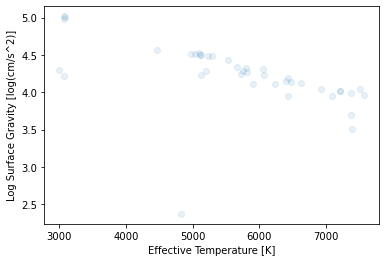

In [8]:
plt.scatter(df.teff_gspphot,df.logg_gspphot, alpha=0.1)
plt.xlabel("Effective Temperature [K]")
plt.ylabel("Log Surface Gravity [log(cm/s^2)]")

There seems to be a general trend where the stars with lower effective temperatures have a lower surface gravity than stars with a higher effective temperature. This makes sense because brighter stars are more massive and therefore have a greater gravitational pull,

In [9]:
np.where(df.non_single_star>0)

(array([ 5, 45, 57, 70], dtype=int64),)

The Hyades Cluster has 4 systems that have more than 1 stars.

In [10]:
Hyades=pd.read_csv('HyadesCluster.csv') 
Beehive=pd.read_csv('BeehiveCluster.csv')  
Ptolemy=pd.read_csv('PtolemyCluster.csv')

The function below takes in a database and calculates the absolute magnitude of every star in the database using their apparent magnitude and parallax information.

In [11]:
def getAbsoluteMag(dataframe):
   
    appmag=dataframe.phot_rp_mean_mag
    plx=dataframe.parallax*1e-3 #mas to as
    dist=np.divide(1,abs(plx))
    absmag=appmag+5+5*np.log10(abs(plx)/10)
    return absmag

In [12]:
absMag_Beehive=getAbsoluteMag(Beehive)
absMag_Ptolemy=getAbsoluteMag(Ptolemy)
absMag_Hyades=getAbsoluteMag(Hyades)

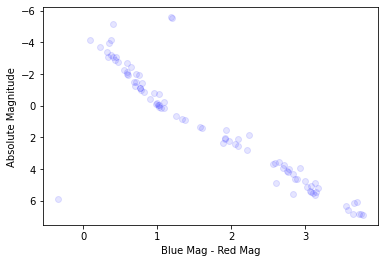

In [13]:
HyadesBR=Hyades.bp_rp

plt.scatter(HyadesBR,absMag_Hyades, color='blue', alpha=0.1)
plt.xlabel('Blue Mag - Red Mag')
plt.ylabel('Absolute Magnitude')

ax = plt.gca()
ax.invert_yaxis()

Most stars follows a clear trend also know as the main sequence. A few stars are also starting to leave the main sequence at the very top turning into red giants as well as one potential white dwarf at the bottom left.

In [14]:
def AbsMag_BR_Plot(dataframe, pointcolor, labelx, labely):
    Abs_Mag = getAbsoluteMag(dataframe)
    BR = dataframe.bp_rp
    plt.scatter(BR, Abs_Mag, color=pointcolor, alpha=0.1)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    return 

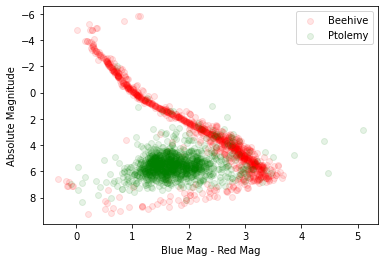

In [15]:
AbsMag_BR_Plot(Beehive, 'red', 'Blue Mag - Red Mag', 'Absolute Magnitude')
AbsMag_BR_Plot(Ptolemy, 'green', 'Blue Mag - Red Mag', 'Absolute Magnitude')

plt.legend(('Beehive', 'Ptolemy'))

ax = plt.gca()
ax.invert_yaxis()

### Similarities

Both clusters have stars following the main sequence trend even though it is much much fewer for Ptolemy. Both clusters seem to have something weird going on at the bottom of the plot between 1 and 3 Blue-Red mag where most of the stars for Ptolemy are found and there is some other sort of trend happening for stars in Beehive.

### Differences

While most stars in Beehive follows the main sequence, most stars in Ptolemy do not. They are in fact completely adjacent to the main sequence. Ptolemy seems to comprise of a lot of dim stars while Beehive has it's stars spread out over the absolute magnitude scale.

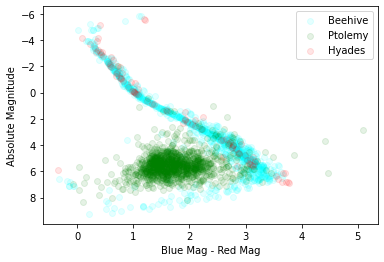

In [16]:
AbsMag_BR_Plot(Beehive, 'cyan', 'Blue Mag - Red Mag', 'Absolute Magnitude')
AbsMag_BR_Plot(Ptolemy, 'green', 'Blue Mag - Red Mag', 'Absolute Magnitude')
AbsMag_BR_Plot(Hyades, 'red', 'Blue Mag - Red Mag', 'Absolute Magnitude')

plt.legend(('Beehive', 'Ptolemy', 'Hyades'))

ax = plt.gca()
ax.invert_yaxis()

Beehive and Ptolemy have a lot more stars than Hyades does. Most of the stars in Beehive and Hyades follow the main sequence while most of the stars in ptolemy do not. 

This is because of their differences in age. Hyades is 625.4 millions years old, Beehive is 625.4 or 600 million years old depending on the source and Ptolemy and 200.1 million years old. The stars in the older cluster have had time to migrate onto the main sequence.

In [17]:
def multicoords(filename):
    '''
    This function takes the name of a file, does magic, then returns
    the RA, Dec, galactic longitude, galactic latitude, galactic
    positions (X,Y,Z), and galactic velocity coordinates (U,V,W)
    of all stars in the file.
    
    To use:
    
    ra, dec, gl, gb, X, Y, Z, U, V, W = multicoords('GaiaData.csv')
    
    '''
    Data=pd.read_csv(filename)      
    df=Data
    
    
    ra=df.ra
    dec=df.dec
    pmra=df.pmra
    pmdec=df.pmdec
    rv=df.radial_velocity

    dist=1/(df.parallax/1000)

    gl,gb=equatorial_galactic(ra,dec) #galactic longitude and latitude
    X,Y,Z=equatorial_XYZ(ra,dec,dist) #galactic position coordinates
    U,V,W=equatorial_UVW(ra,dec,pmra,pmdec,rv,dist) #galactic velocity coordinates
    
    return ra, dec, gl, gb, X, Y, Z, U, V, W

In [18]:
ra_BH, dec_BH, gl_BH, gb_BH, X_BH, Y_BH, Z_BH, U_BH, V_BH, W_BH=multicoords('BeehiveCluster.csv')
ra_PL, dec_PL, gl_PL, gb_PL, X_PL, Y_PL, Z_PL, U_PL, V_PL, W_PL=multicoords('PtolemyCluster.csv')